Load data for network from file

In [1]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from pprint import pprint
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline
sess = tf.InteractiveSession()
    

In [2]:
with open("datasets/wine/wine_train.json") as json_data:
    dataset = json.load(json_data)

train_x = np.asarray(dataset["attribs"])
train_y = np.asarray(dataset["target_hot"])

In [3]:
class TfAnn(object):
    
    def __init__(self):
        self.hidden=[]
        self.np_hidden=[]
        
        self.n_nodes=[]
        self.n_classes = 0
        self.n_hiden_layers = 0

    
    def init_empty(self,layers,n_classes,size):
        self.n_classes = n_classes
        self.n_hiden_layers = len(layers)
        for i in range(self.n_hiden_layers):
            self.hidden.append({'weights':[],'biases':[]})
            self.np_hidden.append({'weights':[],'biases':[]})
            self.n_nodes.append(layers[i])
        self.output_layer = {'weights':[],'biases':[]}
        self.np_output_layer={"weights":[],"biases":[]}

        for i in range(self.n_hiden_layers):
            self.hidden[i] = {'weights':tf.Variable(tf.random_normal([size, self.n_nodes[i]])),
                      'biases':tf.Variable(tf.random_normal([self.n_nodes[i]]))}
            
        self.output_layer = {'weights':tf.Variable(tf.random_normal([self.n_nodes[-1], self.n_classes])),
                        'biases':tf.Variable(tf.random_normal([self.n_classes]))}


    def init_json(self,tf_json):
        tf_data = json.loads(tf_json)
        self.n_classes = tf_data["n_classes"]
        self.n_hiden_layers = tf_data["n_hiden_layers"]
        self.hidden =tf_data["hidden"]
        self.output_layer =tf_data["output"]


    def create(self,data):
        # This is the heart of the ann where multiply the data by the wights to the layers 
        for i in range(self.n_hiden_layers):
            layer = tf.add(tf.matmul(data,self.hidden[i]['weights']), self.hidden[i]['biases'])
            layer= tf.nn.relu(layer)
        output =  tf.add(tf.matmul(layer,self.output_layer['weights']) , self.output_layer['biases'])
        return output
    
    def extract(self):
        for i in range(self.n_hiden_layers):
            self.np_hidden[i]["weights"] = neural_network_model.hidden[i]["weights"].eval().tolist()
            self.np_hidden[i]["biases"] = neural_network_model.hidden[i]["biases"].eval().tolist()
        self.np_output_layer["weights"] = neural_network_model.output_layer["weights"].eval().tolist()
        self.np_output_layer["biases"] = neural_network_model.output_layer["biases"].eval().tolist()
        return json.dumps({"n_classes":self.n_classes,"n_hiden_layers":self.n_hiden_layers ,"hidden":self.np_hidden,"output":self.np_output_layer}, ensure_ascii=False)
        
        

In [4]:
def train_neural_network_interactive(neural_network_model,x_data_train,y_data_train,x_data_test,y_data_test,hm_epochs):
    x = tf.placeholder('float')
    y = tf.placeholder('float')
    prediction = neural_network_model.create(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    init = tf.initialize_all_variables()
    sess.run(init)
    losses=[]
    for epoch in range(hm_epochs):
            _, c = sess.run([optimizer, cost], feed_dict={x:x_data_train,
                                                          y:y_data_train})
            losses.append(c)
    cf = test_neural_network(neural_network_model,x_data_test,y_data_test)
    return cf,losses
   

In [5]:
from sklearn.metrics import precision_recall_fscore_support as score

def test_neural_network(neural_network_model,x_data_test,y_data_test):
    x = tf.placeholder('float')
    prediction = neural_network_model.create(x)    
    y_test_res=(sess.run(prediction,feed_dict={x:x_data_test}))  
    true_class=np.argmax(y_data_test,1)
    predicted_class=np.argmax(y_test_res,1)
    precision, recall, fscore, support = score(true_class, predicted_class)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))   
    cm = confusion_matrix(predicted_class,true_class)
    cm = cm.astype('float')*10000 / cm.sum(axis=1)[:, np.newaxis]
    cm = np.nan_to_num(cm, copy=True)
    cm = cm.astype('int')
    return cm*0.01

In [6]:
from sklearn.model_selection import StratifiedKFold
train_index=[]
test_index=[]
splits =5
skf = StratifiedKFold(n_splits=splits,random_state=0,shuffle=True)
for train_idx, test_idx in skf.split(train_x,train_y[:,0]):               
    train_index.append(train_idx)
    test_index.append(test_idx)

In [7]:
import seaborn as sns
def plot_confusion_matrix(cm, classes, title,classifier_name):
    plt.rcParams.update({'font.size': 18})
    fig,ax= plt.subplots(figsize=(5,4))
    sns.set(font_scale=1.5)
    sns_plot = sns.heatmap(cm, annot=True, ax = ax, cmap="Blues"); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title(title); 
    ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use `tf.global_variables_initializer` instead.
precision: [1.         0.91666667 0.875     ]
recall: [0.9        0.91666667 1.        ]
fscore: [0.94736842 0.91666667 0.93333333]
support: [10 12  7]
array([[100.  ,   0.  ,   0.  ],
       [  8.33,  91.66,   0.  ],
       [  0.  ,  12.5 ,  87.5 ]])


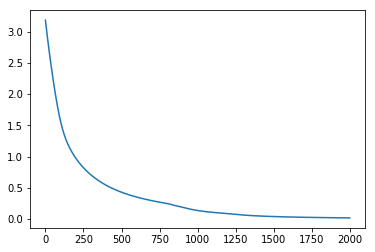

precision: [1. 1. 1.]
recall: [1. 1. 1.]
fscore: [1. 1. 1.]
support: [10  8 11]
array([[100.,   0.,   0.],
       [  0., 100.,   0.],
       [  0.,   0., 100.]])


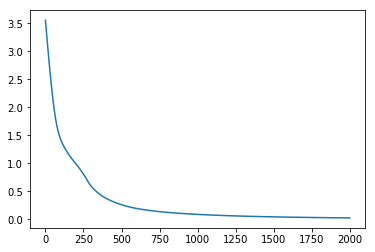

precision: [1. 1. 1.]
recall: [1. 1. 1.]
fscore: [1. 1. 1.]
support: [ 9 13  6]
array([[100.,   0.,   0.],
       [  0., 100.,   0.],
       [  0.,   0., 100.]])


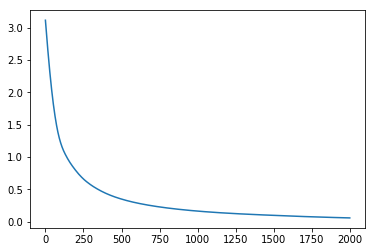

precision: [1.         1.         0.88888889]
recall: [1.         0.90909091 1.        ]
fscore: [1.         0.95238095 0.94117647]
support: [ 9 11  8]
array([[100.  ,   0.  ,   0.  ],
       [  0.  , 100.  ,   0.  ],
       [  0.  ,  11.11,  88.88]])


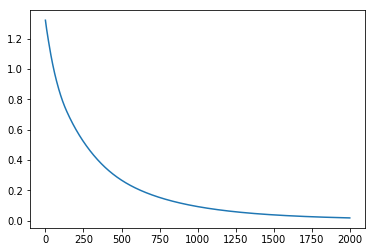

precision: [1.         1.         0.85714286]
recall: [1.         0.92307692 1.        ]
fscore: [1.         0.96       0.92307692]
support: [ 9 13  6]
array([[100.  ,   0.  ,   0.  ],
       [  0.  , 100.  ,   0.  ],
       [  0.  ,  14.28,  85.71]])


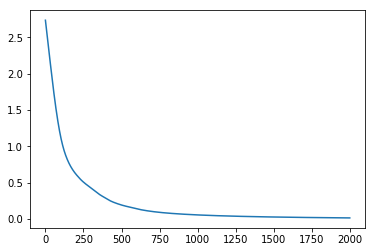

array([[100.   ,   0.   ,   0.   ],
       [  1.666,  98.332,   0.   ],
       [  0.   ,   7.578,  92.418]])


In [8]:
av_cf = np.empty([3,3,0])
for fold in range(splits):
    neural_network_model = TfAnn()
    neural_network_model.init_empty([13],len(train_y[0]),len(train_x[0]))
    x_data_train = train_x[train_index[fold]]
    y_data_train = train_y[train_index[fold]] 
    x_data_test = train_x[test_index[fold]]
    y_data_test = train_y[test_index[fold]]
    cf,loss = train_neural_network_interactive(neural_network_model,x_data_train,y_data_train,x_data_test,y_data_test,2000)
    av_cf = np.dstack([av_cf,cf])
    pprint( cf)
    #plot_confusion_matrix(cf,[1,2,3],"Cf matrix","wine")
    plt.plot(loss)
    plt.show()
pprint(av_cf.mean(axis=2))

precision: [1. 1. 1.]
recall: [1. 1. 1.]
fscore: [1. 1. 1.]
support: [47 57 38]
array([[100.,   0.,   0.],
       [  0., 100.,   0.],
       [  0.,   0., 100.]])


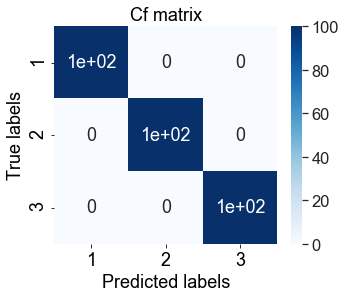

In [9]:
neural_network_model = TfAnn()
neural_network_model.init_empty([13],len(train_y[0]),len(train_x[0]))
x_data_train = train_x
y_data_train = train_y
x_data_test = train_x
y_data_test = train_y
cf,loss = train_neural_network_interactive(neural_network_model,x_data_train,y_data_train,x_data_test,y_data_test,2000)
pprint(cf)
plot_confusion_matrix(cf,[1,2,3],"Cf matrix","wine")
plt.show()

In [10]:
tf_json = neural_network_model.extract()

In [11]:
pprint(tf_json)

('{"n_classes": 3, "n_hiden_layers": 1, "hidden": [{"weights": '
 '[[-0.31715983152389526, -0.12722794711589813, 0.8969488739967346, '
 '-0.5345843434333801, 1.559386134147644, 0.9273849725723267, '
 '0.397106796503067, -0.8623676300048828, -0.6885489821434021, '
 '0.17859536409378052, 2.3174285888671875, -2.4136407375335693, '
 '-0.1908590942621231], [-0.4198348820209503, -1.0276975631713867, '
 '0.7658721804618835, -1.1198961734771729, 1.266163945198059, '
 '-0.37639400362968445, 0.6628599166870117, 1.5067651271820068, '
 '-0.3445203900337219, -0.6000126004219055, -0.26545044779777527, '
 '0.5683143734931946, -1.0665924549102783], [-0.7952247858047485, '
 '0.7359622716903687, 0.5692834854125977, 0.7151359915733337, '
 '0.06312581896781921, -1.2001324892044067, -0.7533007860183716, '
 '1.1107687950134277, 3.2212116718292236, -0.1474984586238861, '
 '2.0559732913970947, 0.7960158586502075, -0.5238164663314819], '
 '[-1.2521170377731323, -0.6836854219436646, -0.15520305931568146, '
 '-0

In [12]:
neural_network_model = TfAnn()
neural_network_model.init_json(tf_json)
x_data_test = train_x
y_data_test = train_y
pprint(test_neural_network(neural_network_model,x_data_test,y_data_test))


precision: [1. 1. 1.]
recall: [1. 1. 1.]
fscore: [1. 1. 1.]
support: [47 57 38]
array([[100.,   0.,   0.],
       [  0., 100.,   0.],
       [  0.,   0., 100.]])


In [13]:
with open("datasets/wine/wine_test.json") as json_data:
    test_dataset = json.load(json_data)

test_x = np.asarray(test_dataset["attribs"])
test_y = np.asarray(test_dataset["target_hot"])

precision: [1.         0.82352941 1.        ]
recall: [0.91666667 1.         0.8       ]
fscore: [0.95652174 0.90322581 0.88888889]
support: [12 14 10]


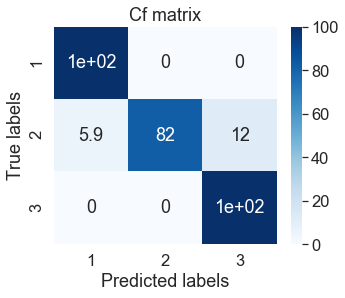

In [14]:
neural_network_model = TfAnn()
neural_network_model.init_json(tf_json)
cf = test_neural_network(neural_network_model,test_x,test_y)
#pprint(test_neural_network(neural_network_model,test_x,test_y))
plot_confusion_matrix(cf,[1,2,3],"Cf matrix","wine")